In [204]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy.spatial.distance import cdist

In [205]:
df = pd.read_csv('all_perth_normalization.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]

In [206]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df

The DataFrame has 30501 rows.
The DataFrame has 11 columns.


,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,DATE_SOLD,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST
0,0.214824,0.333333,0.066667,0.020202,0.000539,0.187500,0.906040,0.93750,0.298026,0.049473,0.032695
1,0.131072,0.222222,0.066667,0.020202,0.000290,0.162736,0.973154,0.96875,0.443495,0.136910,0.235248
2,0.098409,0.222222,0.000000,0.010101,0.000658,0.100236,0.744966,0.84375,0.370761,0.052293,0.068107
3,0.085008,0.111111,0.000000,0.020202,0.000590,0.068396,0.570470,0.93750,0.291260,0.100243,0.064743
4,0.114322,0.333333,0.000000,0.020202,0.000405,0.153302,0.872483,0.87500,0.177929,0.055114,0.062284
...,...,...,...,...,...,...,...,...,...,...,...
30496,0.155360,0.222222,0.066667,0.020202,0.000187,0.126179,0.959732,0.87500,0.409665,0.159474,0.152562
30497,0.173786,0.333333,0.066667,0.020202,0.000339,0.154481,0.979866,0.84375,0.277728,0.069216,0.045117
30498,0.378141,0.222222,0.066667,0.010101,0.000139,0.148585,0.865772,0.96875,0.259121,0.052293,0.045894
30499,0.413735,0.333333,0.133333,0.020202,0.000231,0.287736,0.973154,0.87500,0.260813,0.041011,0.058661


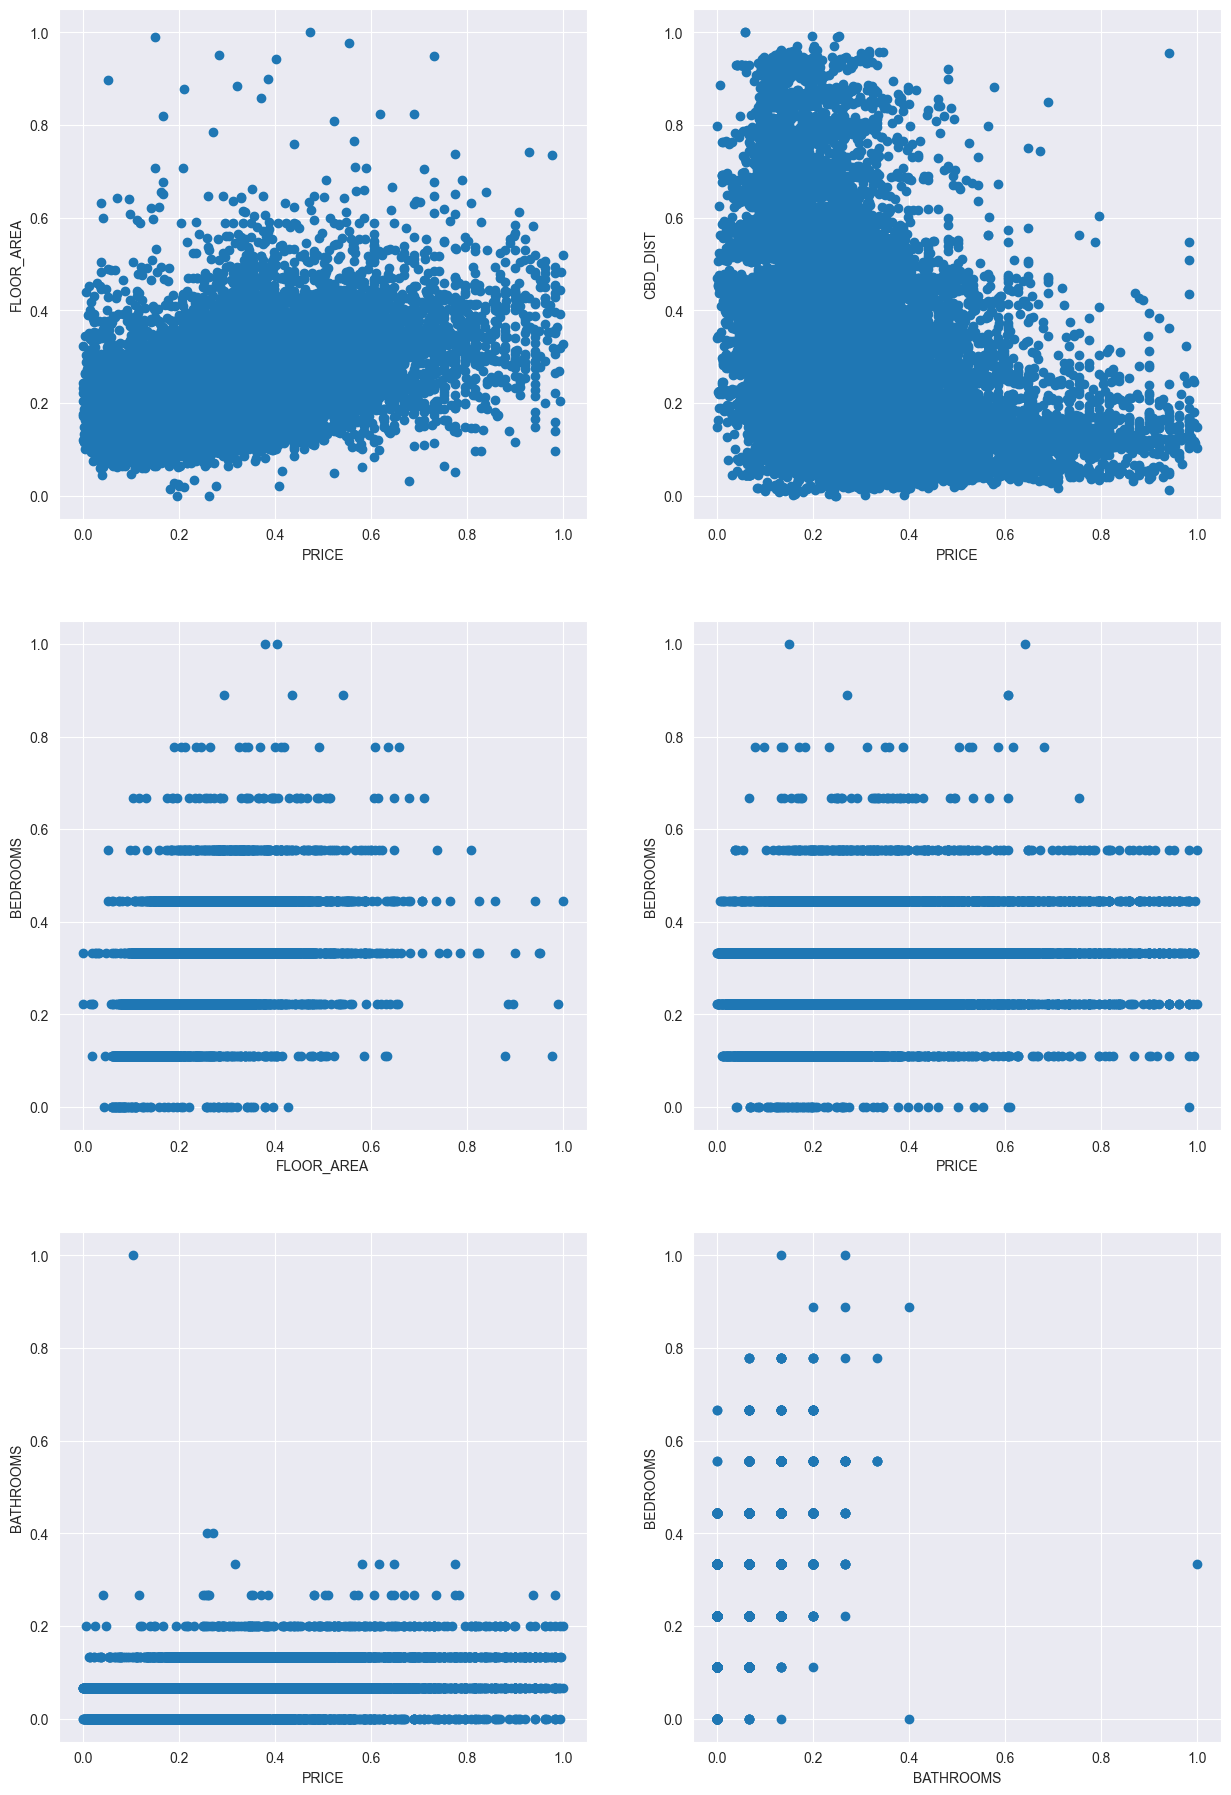

In [207]:
fig, ax = plt.subplots(3, 2, figsize=(15, 22.5))
#Первый график рассеяния: жертвы и террористы
ax[0][0].scatter(df["PRICE"], df["FLOOR_AREA"])
ax[0][0].set_xlabel("PRICE")
ax[0][0].set_ylabel("FLOOR_AREA")

#Второй график рассеяния: жертвы и раненые
ax[0][1].scatter(df["PRICE"], df["CBD_DIST"])
ax[0][1].set_xlabel("PRICE")
ax[0][1].set_ylabel("CBD_DIST")

#Второй график рассеяния: террористы и раненые
ax[1][0].scatter(df["FLOOR_AREA"], df["BEDROOMS"])
ax[1][0].set_xlabel("FLOOR_AREA")
ax[1][0].set_ylabel("BEDROOMS")

#Второй график рассеяния: года и террористы
ax[1][1].scatter(df["PRICE"], df["BEDROOMS"])
ax[1][1].set_xlabel("PRICE")
ax[1][1].set_ylabel("BEDROOMS")

#Второй график рассеяния: года и террористы
ax[2][0].scatter(df["PRICE"], df["BATHROOMS"])
ax[2][0].set_xlabel("PRICE")
ax[2][0].set_ylabel("BATHROOMS")

#Второй график рассеяния: террористы и раненые
ax[2][1].scatter(df["BATHROOMS"], df["BEDROOMS"])
ax[2][1].set_xlabel("BATHROOMS")
ax[2][1].set_ylabel("BEDROOMS")

plt.show()

In [208]:
df_two = df[["PRICE", "BEDROOMS"]]

For n_clusters = 5 The average silhouette_score is : 0.4435641933415372
For n_clusters = 6 The average silhouette_score is : 0.4686676087821539
For n_clusters = 7 The average silhouette_score is : 0.4369748746240059
For n_clusters = 8 The average silhouette_score is : 0.4584028018547265
For n_clusters = 9 The average silhouette_score is : 0.45458658257169465
For n_clusters = 10 The average silhouette_score is : 0.45666187014358517


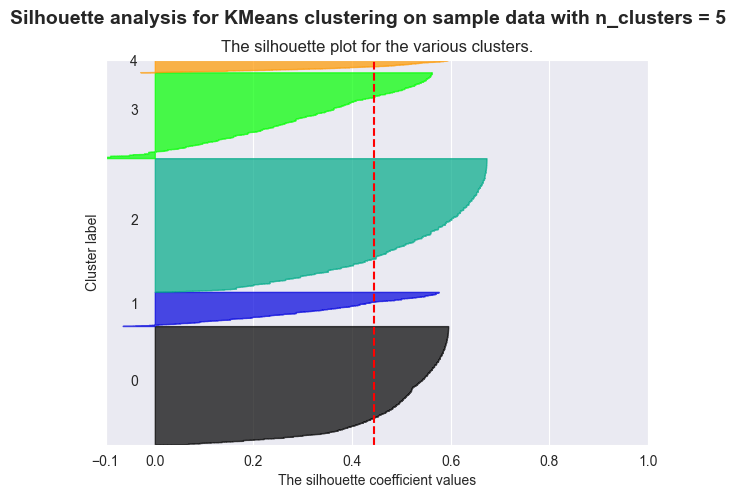

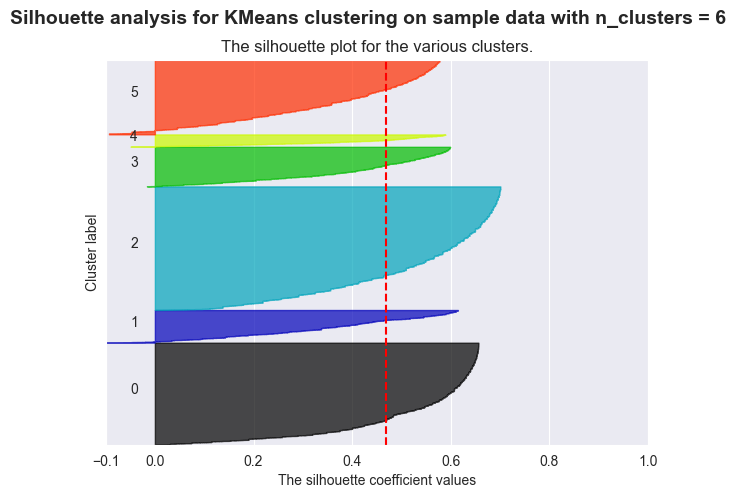

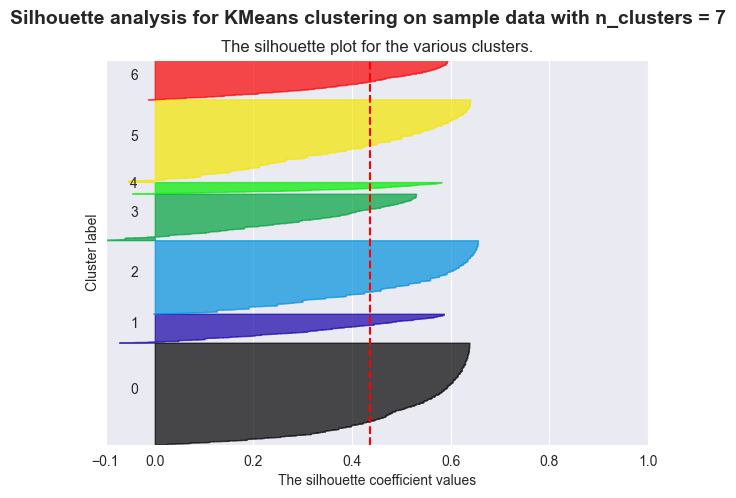

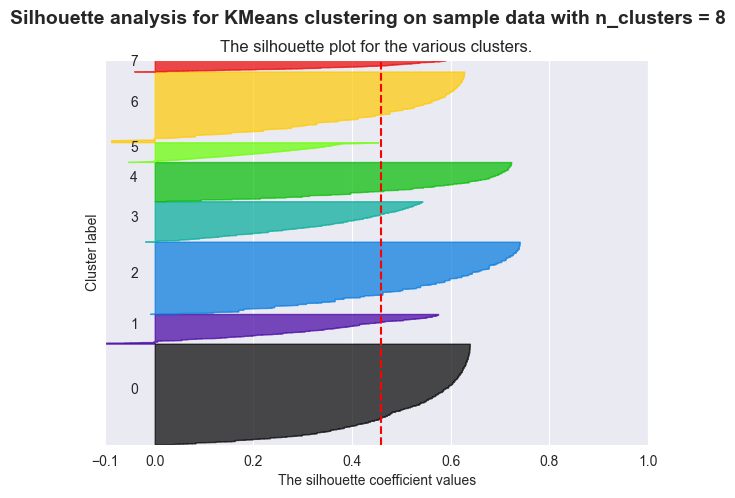

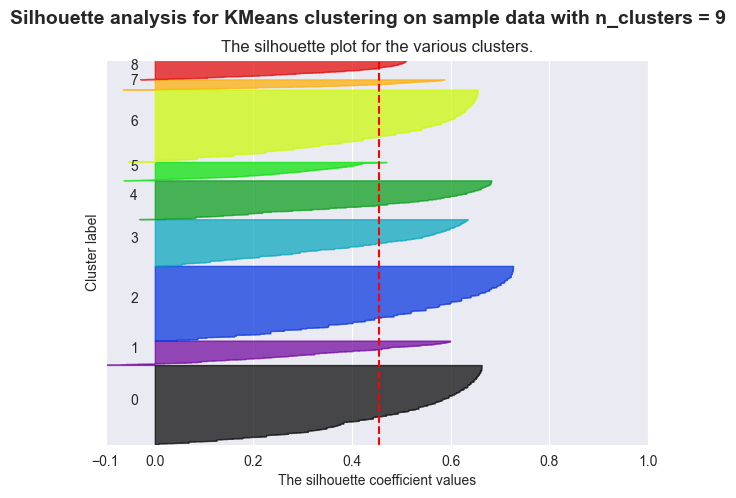

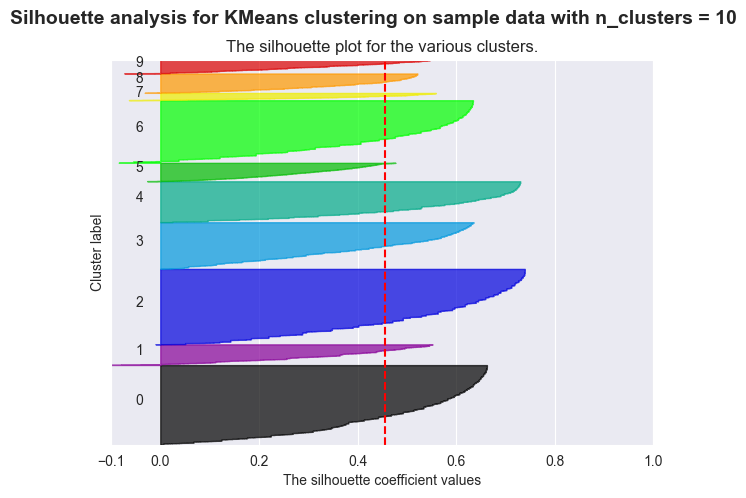

In [290]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

range_n_clusters = list(range(5,11))
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_two) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(df_two)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_two, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_two, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [285]:
distortions = []
inertias = []
k_range = range(3, 20)
for k in k_range:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, max_iter=300, tol=1e-4,n_init="auto", algorithm="elkan")
    labels = kmeans.fit_predict(df_two)
 
    distortions.append(sum(np.min(cdist(df_two, kmeans.cluster_centers_,'euclidean'), axis=1)) / df_two.shape[0])
    inertias.append(kmeans.inertia_)

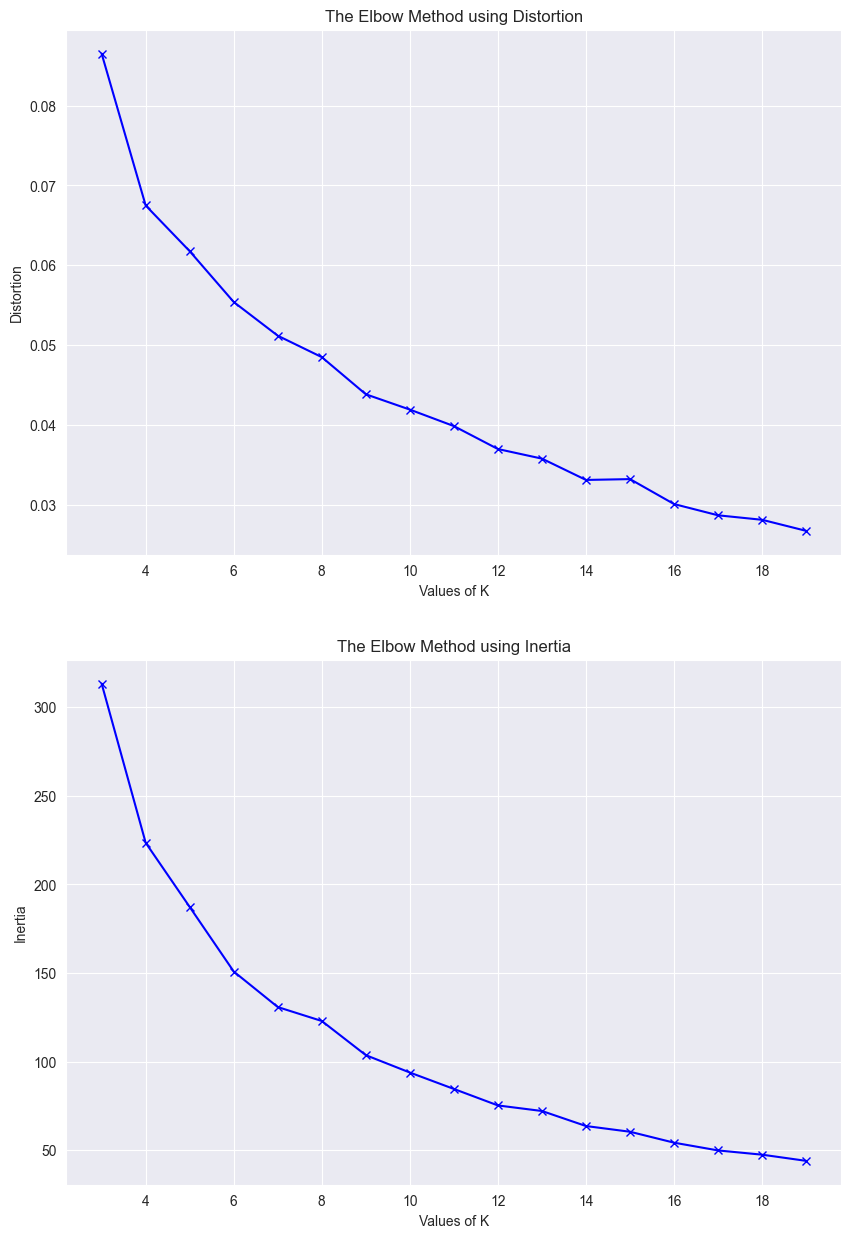

In [286]:
fig = plt.figure(figsize=(10, 15))

ax1 = fig.add_subplot(211)
ax1.plot(k_range, distortions, 'bx-')
ax1.set_xlabel('Values of K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')

ax2 = fig.add_subplot(212)
ax2.plot(k_range, inertias, 'bx-')
ax2.set_xlabel('Values of K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

plt.show()

In [287]:
kmeans = KMeans(n_clusters=6, max_iter=300, tol=1e-4,n_init="auto", algorithm="elkan")
kmeans.fit(df_two)

KMeans(algorithm='elkan', n_clusters=6, n_init='auto')

In [214]:
eps_vals = np.linspace(0.1, 0.01, 5)
min_samples_vals = list(range(3, 10))

best_score = -1
best_eps = None
best_dbscan = None
best_min_samples = None

In [215]:
# DBSCAN clustering
for eps in eps_vals:
    for min_samples in min_samples_vals:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        
        # Fit the model
        labels = dbscan.fit_predict(df_two)
        
        # Ignore cases where the clustering resulted in only one cluster or noise
        if len(np.unique(labels)) > 1:
            score = silhouette_score(df_two, labels, sample_size=1000)
            
            # If the silhouette score is better, store these parameters as the best
            if score > best_score:
                best_dbscan = dbscan
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

Eps: 0.1
Min samples: 3
Min samples: 4
Min samples: 5
Min samples: 6
Min samples: 7
Min samples: 8
Min samples: 9
Eps: 0.0775
Min samples: 3
Min samples: 4
Min samples: 5
Min samples: 6
Min samples: 7
Min samples: 8
Min samples: 9
Eps: 0.055
Min samples: 3
Min samples: 4
Min samples: 5
Min samples: 6
Min samples: 7
Min samples: 8
Min samples: 9
Eps: 0.0325
Min samples: 3
Min samples: 4
Min samples: 5
Min samples: 6
Min samples: 7
Min samples: 8
Min samples: 9
Eps: 0.01
Min samples: 3
Min samples: 4
Min samples: 5
Min samples: 6
Min samples: 7
Min samples: 8
Min samples: 9


In [216]:
print("Best eps: " + str(best_eps))
print("Best score: " + str(best_score))
print("Best min samples: " + str(best_min_samples))

Best eps: 0.055
Best score: 0.27935934854012967
Best min samples: 6


In [217]:
dbscan = best_dbscan

In [218]:
n_clusters_values = list(range(8, 13))
best_score = -1
best_n_clusters = None
best_h_clustering = None

In [219]:
# Agglomerative clustering
for n_clusters in n_clusters_values:
    h_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    
    # Fit the model
    labels = h_clustering.fit_predict(df_two)
    
    # Ignore cases where the clustering resulted in only one cluster or noise
    if len(np.unique(labels)) > 1:
        score = silhouette_score(df_two, labels, sample_size=1000)
        
        # If the silhouette score is better, store these parameters as the best
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
            best_h_clustering = h_clustering

N_clusters: 8
N_clusters: 9
N_clusters: 10
N_clusters: 11
N_clusters: 12


In [220]:
print("Best n_clusters: " + str(best_n_clusters))
print("Best score: " + str(best_score))

Best n_clusters: 11
Best score: 0.487742009236068


In [221]:
h_clustering = best_h_clustering

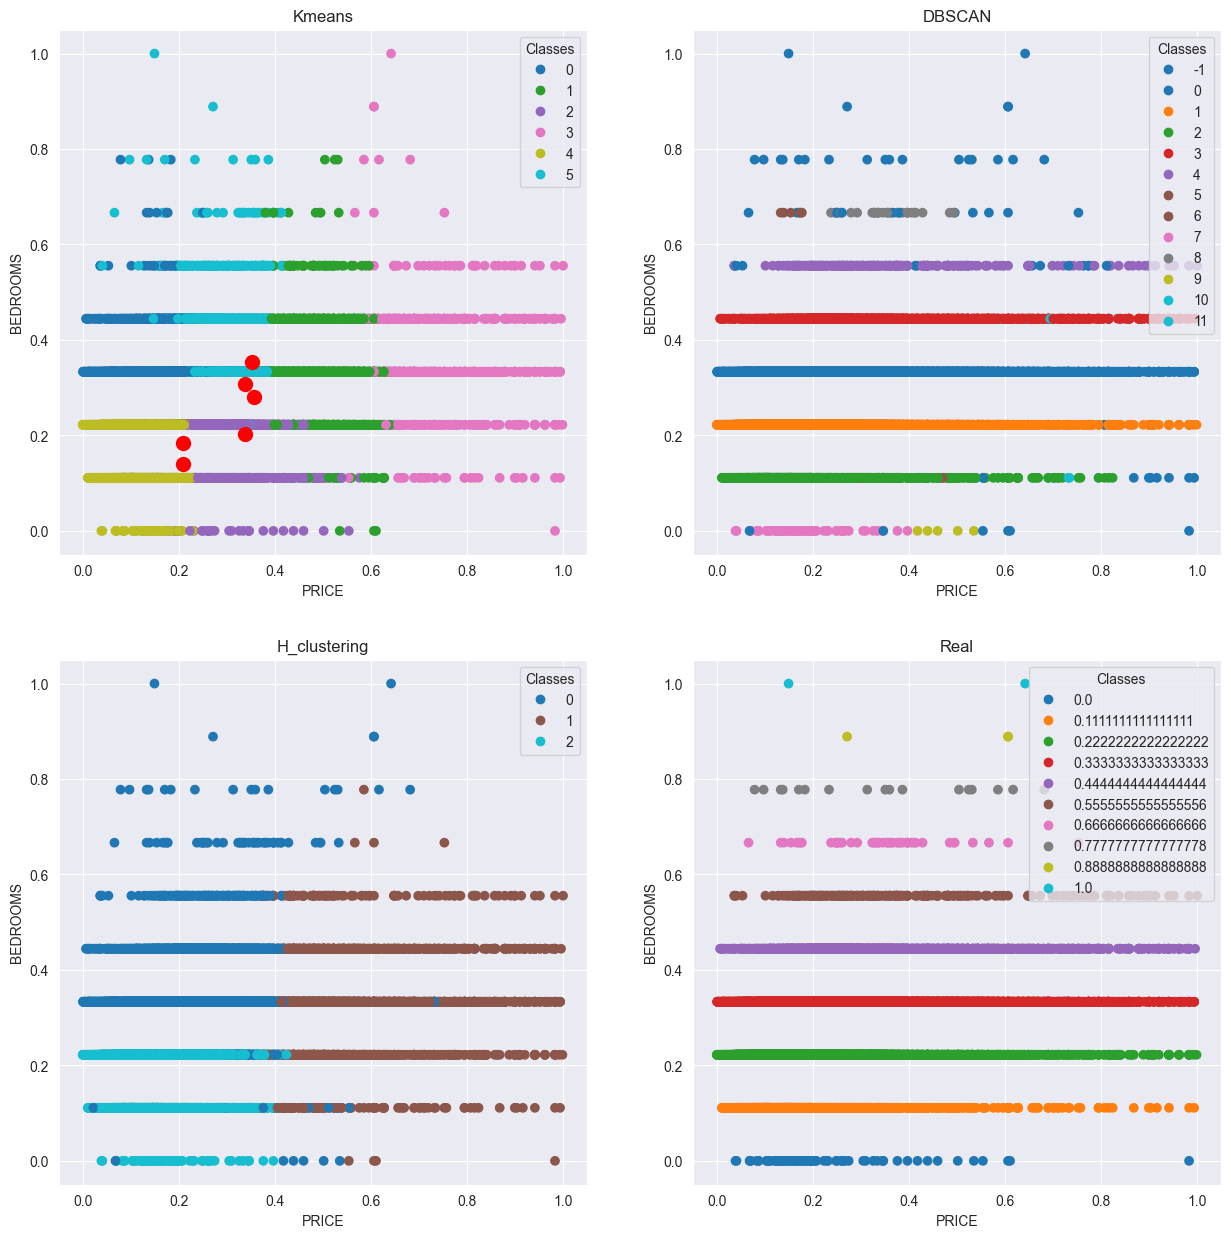

In [294]:
def prepare_and_plot(ax, c, title):
    labels = np.unique(c)  # получаем список уникальных меток
    colors = plt.cm.tab10(np.linspace(0, 1, len(labels)))    # создаем массив цветов
    ax.scatter(df["PRICE"], df["BEDROOMS"], c=c, cmap='tab10')  # указываем нашу карту цветов
    # Создаем легенду в виде списка с данными о маркерах, цветах и метках
    handle_list = [plt.plot([], marker="o", ls="", color=color)[0] for color in colors]
    ax.legend(handle_list, labels, title='Classes')
    ax.set_xlabel("PRICE")
    ax.set_ylabel("BEDROOMS")
    ax.set_title(title)

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

prepare_and_plot(ax[0][0], kmeans.labels_, "Kmeans")
ax[0][0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
prepare_and_plot(ax[0][1], dbscan.labels_, "DBSCAN")
prepare_and_plot(ax[1][0], h_clustering.labels_, "H_clustering")
prepare_and_plot(ax[1][1], df["BEDROOMS"], "Real")

plt.show()

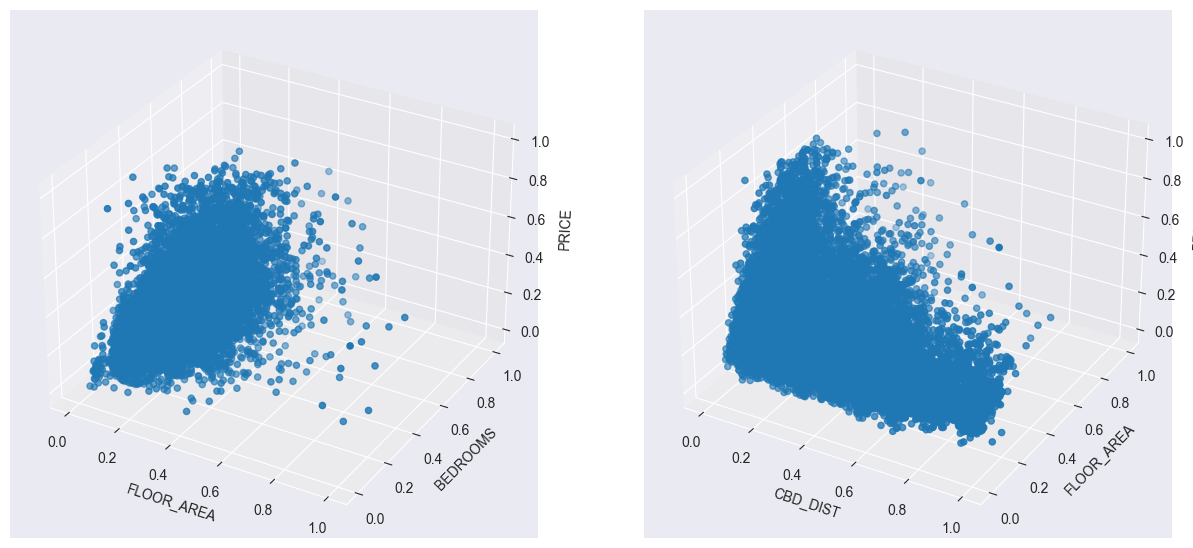

In [223]:
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df["FLOOR_AREA"], df["BEDROOMS"], df["PRICE"])
ax1.set_xlabel("FLOOR_AREA")
ax1.set_ylabel("BEDROOMS")
ax1.set_zlabel("PRICE")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df["CBD_DIST"], df["FLOOR_AREA"], df["PRICE"])
ax2.set_xlabel("CBD_DIST")
ax2.set_ylabel("FLOOR_AREA")
ax2.set_zlabel("PRICE")

plt.show()

In [224]:
df_three = df[["BEDROOMS", "FLOOR_AREA", "PRICE"]]

In [291]:
distortions = []
inertias = []
k_range = range(3, 20)
for k in k_range:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, max_iter=300, tol=1e-4,n_init="auto", algorithm="elkan")
    kmeans.fit(df_three)

    distortions.append(sum(np.min(cdist(df_three, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_three.shape[0])
    inertias.append(kmeans.inertia_)

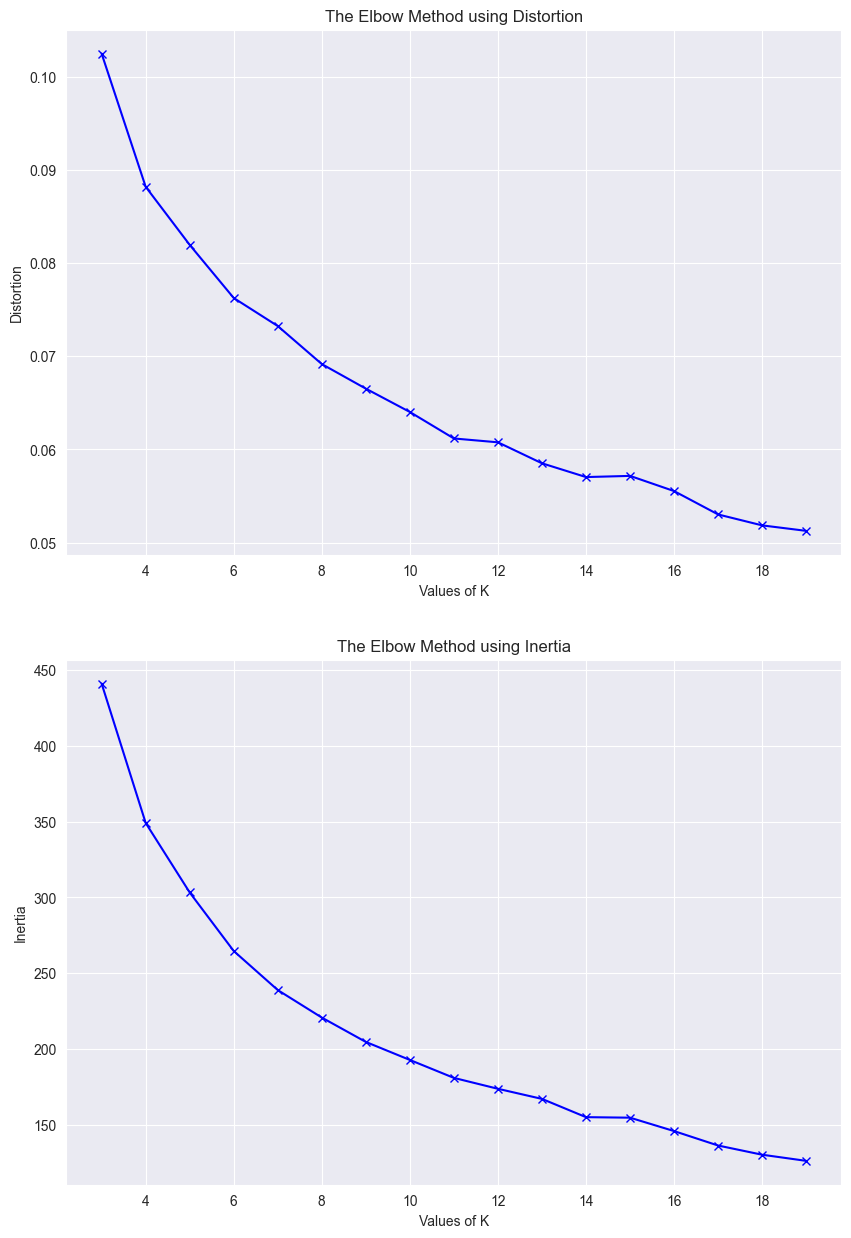

In [292]:
fig = plt.figure(figsize=(10, 15))

ax1 = fig.add_subplot(211)
ax1.plot(k_range, distortions, 'bx-')
ax1.set_xlabel('Values of K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')

ax2 = fig.add_subplot(212)
ax2.plot(k_range, inertias, 'bx-')
ax2.set_xlabel('Values of K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

plt.show()

In [293]:
kmeans =KMeans(n_clusters=6, max_iter=300, tol=1e-4,n_init="auto", algorithm="elkan")
kmeans.fit(df_three)

KMeans(algorithm='elkan', n_clusters=6, n_init='auto')

In [230]:
eps_vals = np.linspace(0.1, 0.01, 5)
min_samples_vals = list(range(3, 10))

best_score = -1
best_eps = None
best_dbscan = None
best_min_samples = None

In [231]:
# DBSCAN clustering
for eps in eps_vals:
    for min_samples in min_samples_vals:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)

        # Fit the model
        labels = dbscan.fit_predict(df_three)

        # Ignore cases where the clustering resulted in only one cluster or noise
        if len(np.unique(labels)) > 1:
            score = silhouette_score(df_three, labels, sample_size=1000)

            # If the silhouette score is better, store these parameters as the best
            if score > best_score:
                best_dbscan = dbscan
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

Eps: 0.1
Min samples: 3
Min samples: 4
Min samples: 5
Min samples: 6
Min samples: 7
Min samples: 8
Min samples: 9
Eps: 0.0775
Min samples: 3
Min samples: 4
Min samples: 5
Min samples: 6
Min samples: 7
Min samples: 8
Min samples: 9
Eps: 0.055
Min samples: 3
Min samples: 4
Min samples: 5
Min samples: 6
Min samples: 7
Min samples: 8
Min samples: 9
Eps: 0.0325
Min samples: 3
Min samples: 4
Min samples: 5
Min samples: 6
Min samples: 7
Min samples: 8
Min samples: 9
Eps: 0.01
Min samples: 3
Min samples: 4
Min samples: 5
Min samples: 6
Min samples: 7
Min samples: 8
Min samples: 9


In [232]:
print("Best eps: " + str(best_eps))
print("Best score: " + str(best_score))
print("Best min samples: " + str(best_min_samples))

Best eps: 0.0775
Best score: 0.22558382973078814
Best min samples: 4


In [233]:
dbscan = best_dbscan

In [252]:
n_clusters_values = list(range(3, 13))
best_score = -1
best_n_clusters = None
best_h_clustering = None

In [253]:
# Agglomerative clustering
for n_clusters in n_clusters_values:
    h_clustering = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit the model
    labels = h_clustering.fit_predict(df_three)

    # Ignore cases where the clustering resulted in only one cluster or noise
    if len(np.unique(labels)) > 1:
        score = silhouette_score(df_three, labels, sample_size=1000)

        # If the silhouette score is better, store these parameters as the best
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
            best_h_clustering = h_clustering

N_clusters: 3
N_clusters: 4
N_clusters: 5
N_clusters: 6
N_clusters: 7
N_clusters: 8
N_clusters: 9
N_clusters: 10
N_clusters: 11
N_clusters: 12


In [254]:
print("Best n_clusters: " + str(best_n_clusters))
print("Best score: " + str(best_score))

Best n_clusters: 3
Best score: 0.3720932800348146


In [255]:
h_clustering = best_h_clustering

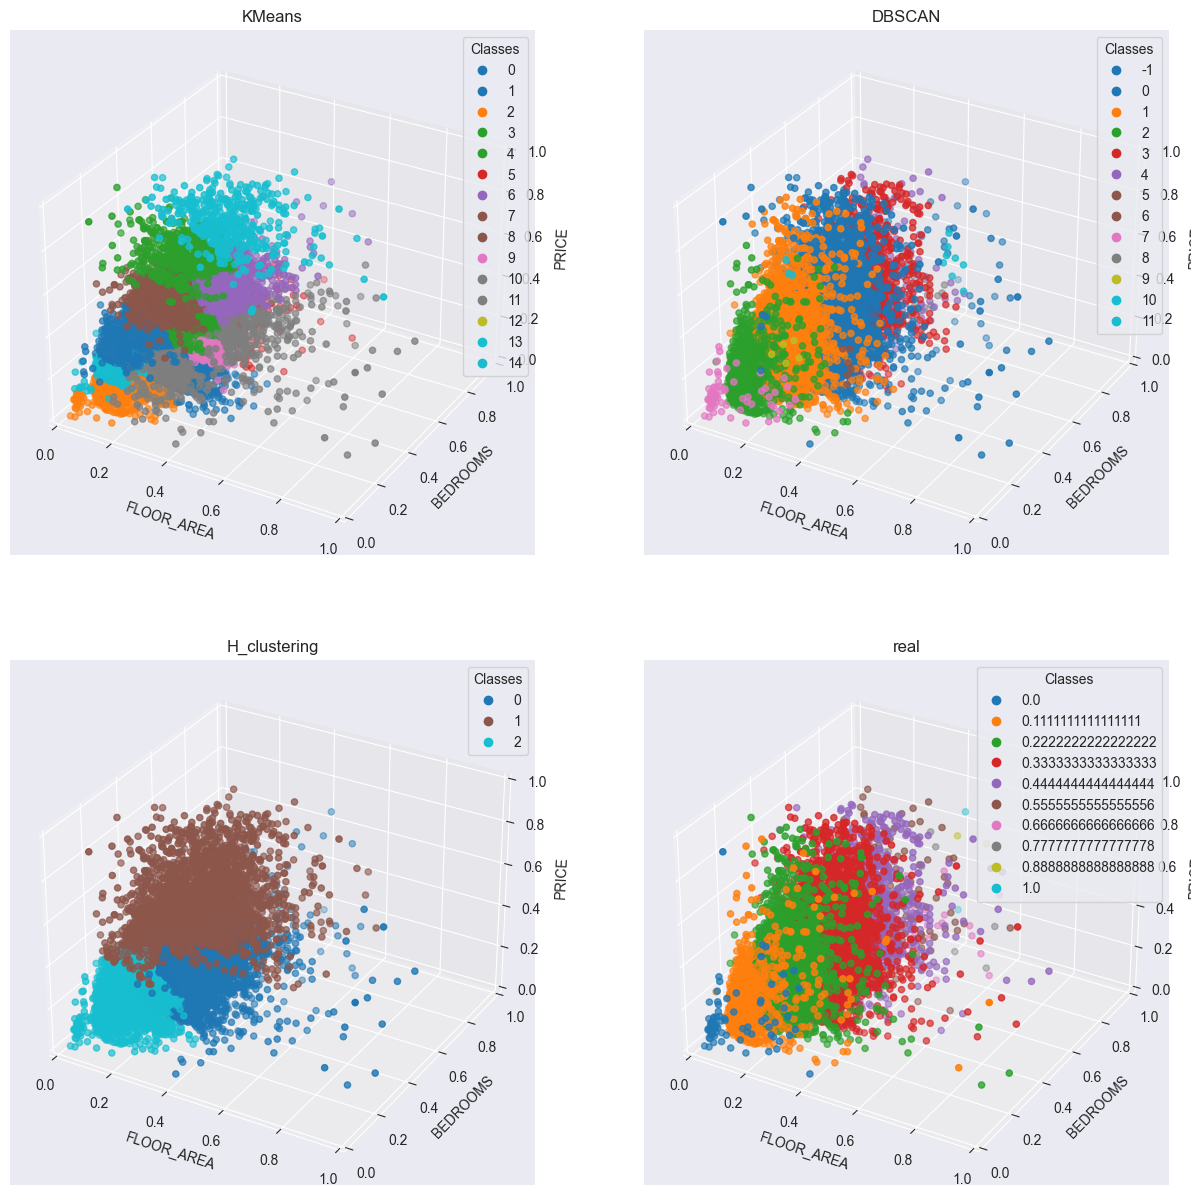

In [256]:
def prepare_and_plot(ax, c, title):
    labels = np.unique(c)  # получаем список уникальных меток
    colors = plt.cm.tab10(np.linspace(0, 1, len(labels)))    # создаем массив цветов
    ax.scatter(df["FLOOR_AREA"], df["BEDROOMS"], df["PRICE"], c=c, cmap='tab10')  # указываем нашу карту цветов
    # Создаем легенду в виде списка с данными о маркерах, цветах и метках
    handle_list = [plt.plot([], [], marker="o", ls="", color=color)[0] for color in colors]
    ax.legend(handle_list, labels, title='Classes')
    ax.set_xlabel("FLOOR_AREA")
    ax.set_ylabel("BEDROOMS")
    ax.set_zlabel("PRICE")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_title(title)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')
# ax5 = fig.add_subplot(325, projection='3d')

prepare_and_plot(ax1, kmeans.labels_, "KMeans")
prepare_and_plot(ax2, dbscan.labels_, "DBSCAN")
prepare_and_plot(ax3, h_clustering.labels_, "H_clustering")
prepare_and_plot(ax4, df["BEDROOMS"], "real")
# prepare_and_plot(ax5, df["BATHROOMS"], "real")

plt.show()

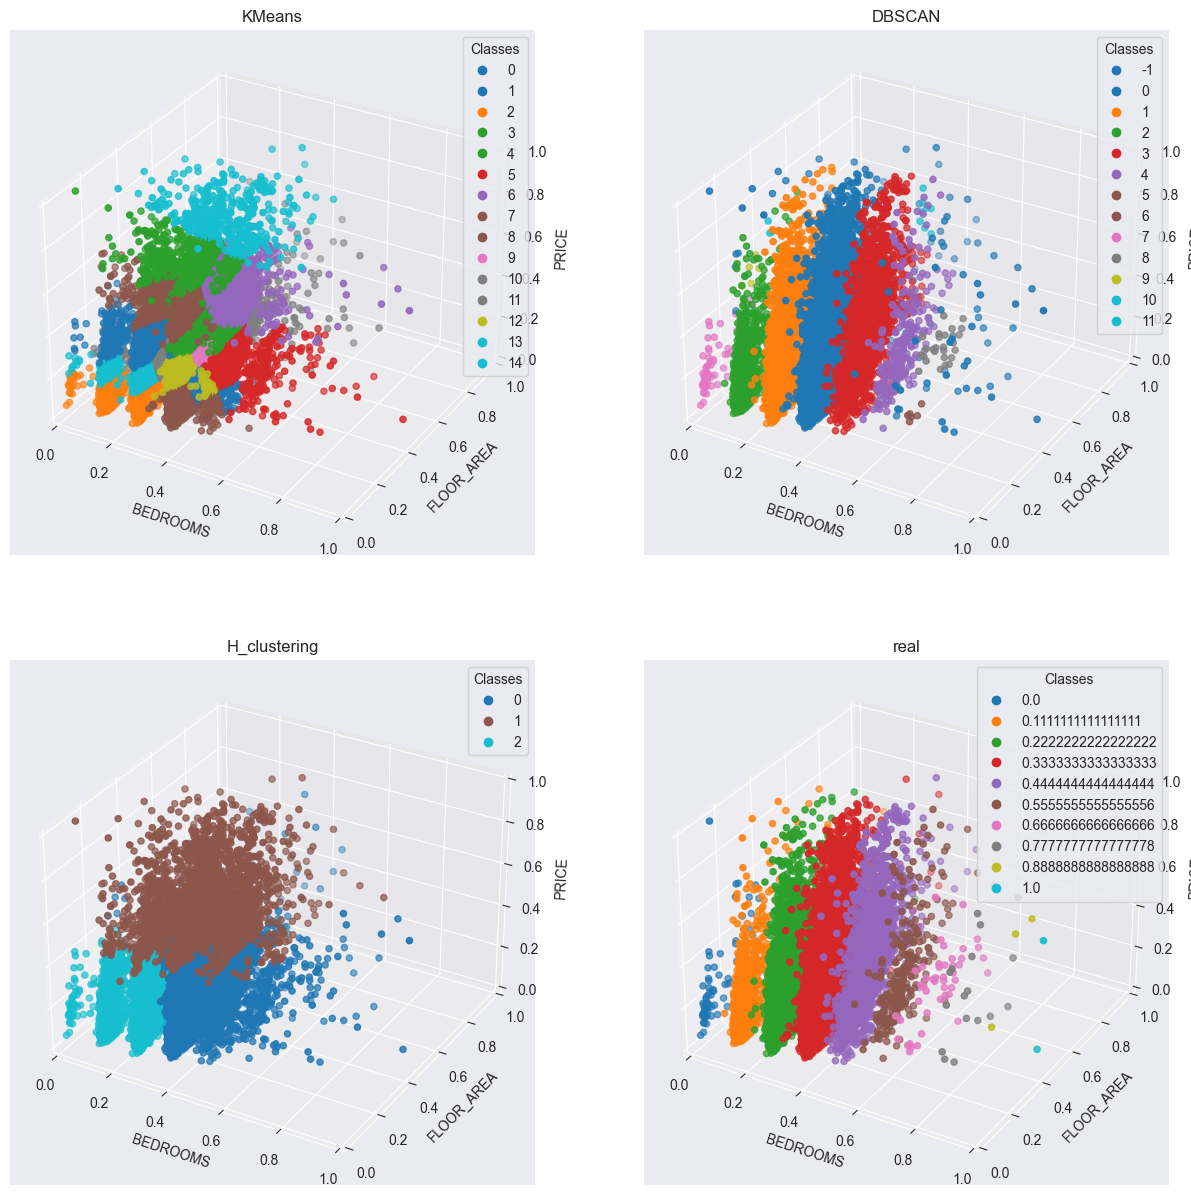

In [257]:
def prepare_and_plot(ax, c, title):
    labels = np.unique(c)  # получаем список уникальных меток
    colors = plt.cm.tab10(np.linspace(0, 1, len(labels)))    # создаем массив цветов
    ax.scatter(df["BEDROOMS"], df["FLOOR_AREA"], df["PRICE"], c=c, cmap='tab10')  # указываем нашу карту цветов
    # Создаем легенду в виде списка с данными о маркерах, цветах и метках
    handle_list = [plt.plot([], [], marker="o", ls="", color=color)[0] for color in colors]
    ax.legend(handle_list, labels, title='Classes')
    ax.set_xlabel("BEDROOMS")
    ax.set_ylabel("FLOOR_AREA")
    ax.set_zlabel("PRICE")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_title(title)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')
# ax5 = fig.add_subplot(325, projection='3d')

prepare_and_plot(ax1, kmeans.labels_, "KMeans")
prepare_and_plot(ax2, dbscan.labels_, "DBSCAN")
prepare_and_plot(ax3, h_clustering.labels_, "H_clustering")
prepare_and_plot(ax4, df["BEDROOMS"], "real")
# prepare_and_plot(ax5, df["BATHROOMS"], "real")

plt.show()